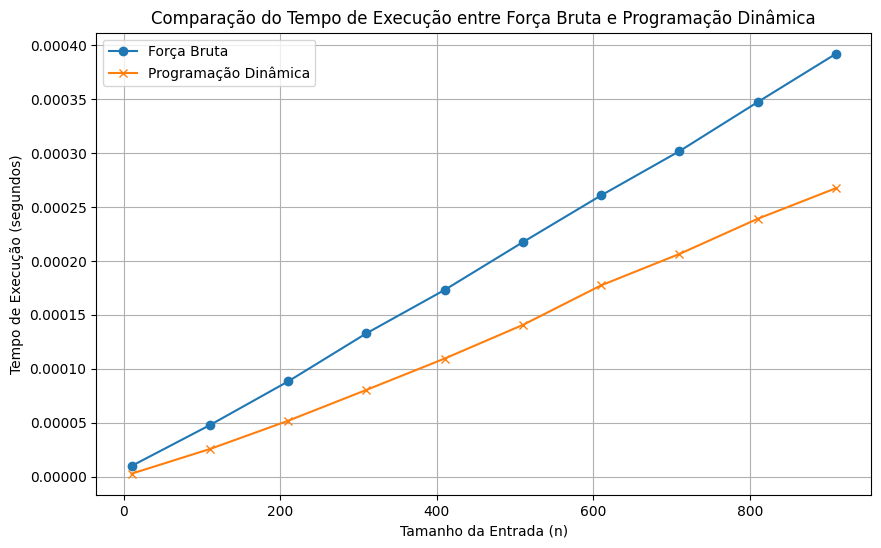

In [1]:
import time
import matplotlib.pyplot as plt

# Algoritmo de Força Bruta
def mochila_forca_bruta(capacidade, pesos, valores):
    """
    Função para resolver o problema da mochila usando o algoritmo de Força Bruta.
    Este algoritmo tenta todas as combinações de itens possíveis para cada capacidade de mochila.
    """
    n = len(pesos)  # Número de itens
    max_valor = 0   # Variável para armazenar o valor máximo da mochila
    
    # Percorre todas as capacidades possíveis, de 0 até a capacidade total da mochila
    for i in range(capacidade + 1):
        valor = 0  # Valor total acumulado para a capacidade i
        peso_restante = i  # Peso restante da mochila para a capacidade i
        
        # Percorre todos os itens e calcula quantos de cada item cabem na mochila
        for j in range(n):
            # Calcula quantos itens do tipo j cabem na mochila de capacidade 'peso_restante'
            valor += (peso_restante // pesos[j]) * valores[j]
            # Atualiza o peso restante após adicionar os itens
            peso_restante = peso_restante % pesos[j]
        
        # Atualiza o valor máximo encontrado para a capacidade i
        max_valor = max(max_valor, valor)
    
    return max_valor  # Retorna o maior valor encontrado

# Algoritmo de Programação Dinâmica
def mochila_programacao_dinamica(capacidade, pesos, valores):
    """
    Função para resolver o problema da mochila usando o algoritmo de Programação Dinâmica.
    Esse algoritmo resolve subproblemas menores e os armazena para evitar recalcular resultados.
    """
    n = len(pesos)  # Número de itens
    # Lista dp onde dp[i] guarda o valor máximo para a capacidade 'i' da mochila
    dp = [0] * (capacidade + 1) 
    
    # Percorre todos os itens
    for i in range(n):
        # Para cada peso de mochila a partir do peso do item até a capacidade total
        for w in range(pesos[i], capacidade + 1):
            # Verifica se incluir o item melhora o valor total para a capacidade w
            dp[w] = max(dp[w], dp[w - pesos[i]] + valores[i])
    
    # Retorna o valor máximo que pode ser alcançado para a capacidade total
    return dp[capacidade]

# Função para medir o tempo de execução dos algoritmos
def medir_tempo_execucao(capacidade, pesos, valores):
    """
    Função que mede o tempo de execução dos algoritmos de Força Bruta e Programação Dinâmica
    para diferentes tamanhos de entrada.
    """
    # Definindo diferentes tamanhos de entrada para medir o tempo de execução
    tamanhos_entrada = list(range(10, 1001, 100))
    
    # Listas para armazenar os tempos de execução dos algoritmos
    tempos_forca_bruta = []
    tempos_programacao_dinamica = []
    
    # Medindo o tempo de execução para cada tamanho de entrada
    for n in tamanhos_entrada:
        # Medindo o tempo de execução da Força Bruta
        start_time = time.time()  # Marca o tempo de início
        mochila_forca_bruta(n, pesos, valores)  # Executa o algoritmo de força bruta
        end_time = time.time()  # Marca o tempo de fim
        tempos_forca_bruta.append(end_time - start_time)  # Adiciona o tempo à lista

        # Medindo o tempo de execução da Programação Dinâmica
        start_time = time.time()  # Marca o tempo de início
        mochila_programacao_dinamica(n, pesos, valores)  # Executa o algoritmo de programação dinâmica
        end_time = time.time()  # Marca o tempo de fim
        tempos_programacao_dinamica.append(end_time - start_time)  # Adiciona o tempo à lista
    
    # Retorna os tamanhos de entrada e os tempos de execução para os dois algoritmos
    return tamanhos_entrada, tempos_forca_bruta, tempos_programacao_dinamica

# Função para gerar o gráfico de comparação
def gerar_grafico(tamanhos_entrada, tempos_forca_bruta, tempos_programacao_dinamica):
    """
    Função para gerar um gráfico comparativo dos tempos de execução entre Força Bruta e Programação Dinâmica.
    """
    # Criando o gráfico
    plt.figure(figsize=(10, 6))  # Define o tamanho da figura
    plt.plot(tamanhos_entrada, tempos_forca_bruta, label='Força Bruta', marker='o')  # Plota os tempos da Força Bruta
    plt.plot(tamanhos_entrada, tempos_programacao_dinamica, label='Programação Dinâmica', marker='x')  # Plota os tempos da Programação Dinâmica
    
    # Adicionando rótulos e título ao gráfico
    plt.xlabel('Tamanho da Entrada (n)')
    plt.ylabel('Tempo de Execução (segundos)')
    plt.title('Comparação do Tempo de Execução entre Força Bruta e Programação Dinâmica')
    
    # Exibindo a legenda e a grade
    plt.legend()
    plt.grid(True)
    
    # Exibindo o gráfico
    plt.show()

# Definição de pesos e valores para os itens da mochila
pesos = [10, 20, 30]  # Pesos dos itens
valores = [60, 100, 120]  # Valores dos itens

# Definição da capacidade da mochila
capacidade = 50  # Capacidade total da mochila

# Medindo o tempo de execução dos dois algoritmos
tamanhos_entrada, tempos_forca_bruta, tempos_programacao_dinamica = medir_tempo_execucao(capacidade, pesos, valores)

# Gerando o gráfico de comparação
gerar_grafico(tamanhos_entrada, tempos_forca_bruta, tempos_programacao_dinamica)
